In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import copy

img_path = "/home/enrico/Desktop/Wires_Stat/ebr_GenesisF_binary_survey4statistics/DE11_280nm_003.tif"
img = cv2.imread(img_path, 0)
img = cv2.fastNlMeansDenoising(img[100 : img.shape[0] - 200, 
           50 : img.shape[1]- 50],dst=img,h=30)

# plt.imshow(img, cmap='Greys_r')
# plt.show()

In [2]:

def min_pool(image):
    im = copy.deepcopy(img)
    im_size = img.shape

    sz = (5, 2)
    stride = (5, 1)
    for i in range(0, im_size[0], stride[0]):
        for j in range(0, im_size[1], stride[1]):
            im[i : i + sz[0], j : j + sz[1]] = np.min(im[i : i + sz[0],j : j + sz[1]])
    return im


In [3]:

def max_pool(image):
    im = copy.deepcopy(img)
    im_size = img.shape

    sz = (5, 2)
    stride = (5, 1)
    for i in range(0, im_size[0], stride[0]):
        for j in range(0, im_size[1], stride[1]):
            im[i : i + sz[0], j : j + sz[1]] = np.max(im[i : i + sz[0],j : j + sz[1]])
    return im


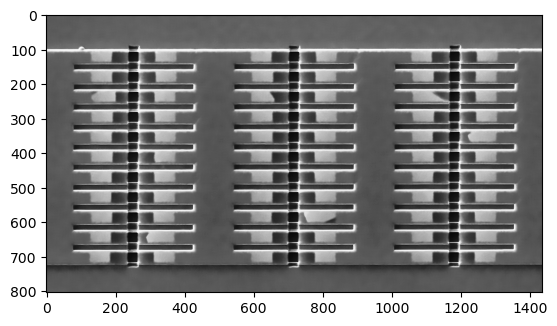

79 78
79 78
237 79
237 79


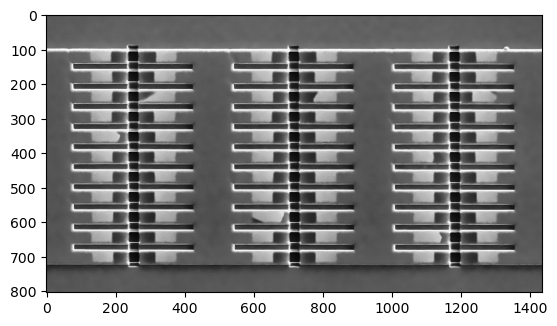

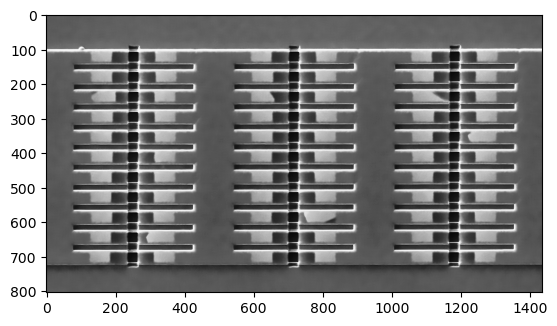

In [4]:
def cut(A):
    min_pl = min_pool(A)[A.shape[0]//3:2*A.shape[0]//3]
    # plt.imshow(min_pl, cmap='Greys_r')
    # plt.show()
    max_pl = max_pool(A)[A.shape[0]//3:2*A.shape[0]//3]
    # plt.imshow(min_pl, cmap='Greys_r')
    # plt.show()
    
    avg_min = np.min(min_pl, axis=0)
    avg_max = np.max(max_pl, axis=0)
    # plt.plot(avg_min)
    # plt.plot(avg_max)
    # plt.show()
    
    grad_min = np.abs(np.gradient(avg_min))
    grad_max = np.abs(np.gradient(avg_max))
    # plt.plot(grad_min)
    # plt.plot(grad_max)
    # plt.show()

    cut_point_1 = np.argmax(grad_min)+1
    cut_point_2 = np.argmax(grad_max)+1
    print(cut_point_1,cut_point_2)
    cut_point = cut_point_1 if cut_point_1>cut_point_2 else cut_point_2

    img1 = A[:,cut_point :]
    return img1

def cut_4(img1):
    plt.imshow(img1, cmap='Greys_r')
    plt.show()
    
    img1 = cut(img1)
    img1 = np.fliplr(img1)
    img1 = cut(img1)
    
    img1 = np.rot90(img1)
    img1 = cut(img1)
    img1 = np.fliplr(img1)
    img1 = cut(img1)
    img1 = np.fliplr(img1)
    img1 = np.rot90(img1,3)
   
    img2 = np.fliplr(img1)
    
    return img1, img2

def split(img1):
    arrays = np.array_split(img1,3,axis=1)
    return arrays


work_img = copy.deepcopy(img)
arr1,arr2 = cut_4(work_img)
plt.imshow(arr1, cmap='Greys_r')
plt.show()

plt.imshow(arr2, cmap='Greys_r')

plt.show()
# arr2 = split(arr1)
# plt.imshow(arr2[0], cmap='Greys_r')
# plt.show()
# plt.imshow(arr2[1], cmap='Greys_r')
# plt.show()
# plt.imshow(arr2[2], cmap='Greys_r')
# plt.show()
